In [ ]:
import gdown
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Replace 'YOUR_FILE_ID' with your Google Drive file ID
file_id = '14HnAWe3ZiZP8qlUcdASZZIFkX2kYoCN_'

# Check sharing settings
gdown.download("https://drive.usercontent.google.com/download?id=14HnAWe3ZiZP8qlUcdASZZIFkX2kYoCN_&export=download&authuser=0&confirm=t&uuid=66e9a259-6328-4a71-aed4-d8d4fe03b34e&at=APZUnTU_y8IjOEAzBe3pWZY1JWT4:1694941568953" + file_id, quiet=False)

Downloading...
From: https://drive.usercontent.google.com/download?id=14HnAWe3ZiZP8qlUcdASZZIFkX2kYoCN_&export=download&authuser=0&confirm=t&uuid=66e9a259-6328-4a71-aed4-d8d4fe03b34e&at=APZUnTU_y8IjOEAzBe3pWZY1JWT4:169494156895314HnAWe3ZiZP8qlUcdASZZIFkX2kYoCN_
To: /content/download?id=14HnAWe3ZiZP8qlUcdASZZIFkX2kYoCN_&export=download&authuser=0&confirm=t&uuid=66e9a259-6328-4a71-aed4-d8d4fe03b34e&at=APZUnTU_y8IjOEAzBe3pWZY1JWT4:169494156895314HnAWe3ZiZP8qlUcdASZZIFkX2kYoCN_
100%|██████████| 71.0M/71.0M [00:01<00:00, 43.2MB/s]


'download?id=14HnAWe3ZiZP8qlUcdASZZIFkX2kYoCN_&export=download&authuser=0&confirm=t&uuid=66e9a259-6328-4a71-aed4-d8d4fe03b34e&at=APZUnTU_y8IjOEAzBe3pWZY1JWT4:169494156895314HnAWe3ZiZP8qlUcdASZZIFkX2kYoCN_'

In [ ]:
# Define the file URL (change this to your dataset URL)
file_url = 'https://drive.usercontent.google.com/download?id=14HnAWe3ZiZP8qlUcdASZZIFkX2kYoCN_&export=download&authuser=0&confirm=t&uuid=e14d0896-4205-4df8-8044-546af255e003&at=APZUnTWKaBE7PlVLChsSJSwgGBbM:1694323959491'

# Define the destination file path
output_file = '/content/dataset.zip'  # Change this to your desired destination

# Download the file
gdown.download(file_url, output_file, quiet=False)

# Unzip the file
with zipfile.ZipFile(output_file, 'r') as zip_ref:
    zip_ref.extractall('/content/')

Downloading...
From: https://drive.usercontent.google.com/download?id=14HnAWe3ZiZP8qlUcdASZZIFkX2kYoCN_&export=download&authuser=0&confirm=t&uuid=e14d0896-4205-4df8-8044-546af255e003&at=APZUnTWKaBE7PlVLChsSJSwgGBbM:1694323959491
To: /content/dataset.zip
100%|██████████| 71.0M/71.0M [00:00<00:00, 258MB/s]


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
# Define constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 2
EPOCHS = 10

In [ ]:
# Load and preprocess data
train_data = pd.read_csv("train/_annotations.csv")
test_data = pd.read_csv("test/_annotations.csv")

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory="train",
    x_col="filename",
    y_col="class",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

Found 3364 validated image filenames belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    directory="test",
    x_col="filename",
    y_col="class",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

Found 441 validated image filenames belonging to 2 classes.


In [ ]:
# Create MobileNet model
base_model = MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model = Model(inputs=base_model.input, outputs=output)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(train_generator, validation_data=test_generator, epochs=EPOCHS)

Epoch 1/10
106/106 [==============================] - 45s 146ms/step - loss: 0.7343 - accuracy: 0.7117 - val_loss: 0.6104 - val_accuracy: 0.7007
Epoch 2/10
106/106 [==============================] - 19s 183ms/step - loss: 0.4537 - accuracy: 0.7628 - val_loss: 0.6043 - val_accuracy: 0.6417
Epoch 3/10
106/106 [==============================] - 26s 246ms/step - loss: 0.4201 - accuracy: 0.7886 - val_loss: 0.4654 - val_accuracy: 0.7664
Epoch 4/10
106/106 [==============================] - 19s 175ms/step - loss: 0.4124 - accuracy: 0.7854 - val_loss: 0.5331 - val_accuracy: 0.7551
Epoch 5/10
106/106 [==============================] - 14s 136ms/step - loss: 0.4117 - accuracy: 0.7916 - val_loss: 0.5637 - val_accuracy: 0.6644
Epoch 6/10
106/106 [==============================] - 14s 135ms/step - loss: 0.3937 - accuracy: 0.7964 - val_loss: 0.4658 - val_accuracy: 0.7596
Epoch 7/10
106/106 [==============================] - 15s 144ms/step - loss: 0.3913 - accuracy: 0.7958 - val_loss: 0.5477 - val_ac

In [ ]:
# Save the model
model.save("violence_detection_mobilenet.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
history = model.fit(train_generator, validation_data=test_generator, epochs=EPOCHS)

Epoch 1/10
106/106 [==============================] - 15s 137ms/step - loss: 0.3722 - accuracy: 0.8011 - val_loss: 0.4972 - val_accuracy: 0.7460
Epoch 2/10
106/106 [==============================] - 15s 140ms/step - loss: 0.3718 - accuracy: 0.8068 - val_loss: 0.4101 - val_accuracy: 0.7596
Epoch 3/10
106/106 [==============================] - 15s 138ms/step - loss: 0.3682 - accuracy: 0.8050 - val_loss: 0.7026 - val_accuracy: 0.7370
Epoch 4/10
106/106 [==============================] - 14s 132ms/step - loss: 0.3711 - accuracy: 0.8014 - val_loss: 0.4822 - val_accuracy: 0.7415
Epoch 5/10
106/106 [==============================] - 14s 134ms/step - loss: 0.3766 - accuracy: 0.8038 - val_loss: 0.4783 - val_accuracy: 0.7279
Epoch 6/10
106/106 [==============================] - 14s 132ms/step - loss: 0.3763 - accuracy: 0.8029 - val_loss: 0.6453 - val_accuracy: 0.7642
Epoch 7/10
106/106 [==============================] - 14s 135ms/step - loss: 0.3665 - accuracy: 0.8023 - val_loss: 0.4921 - val_ac

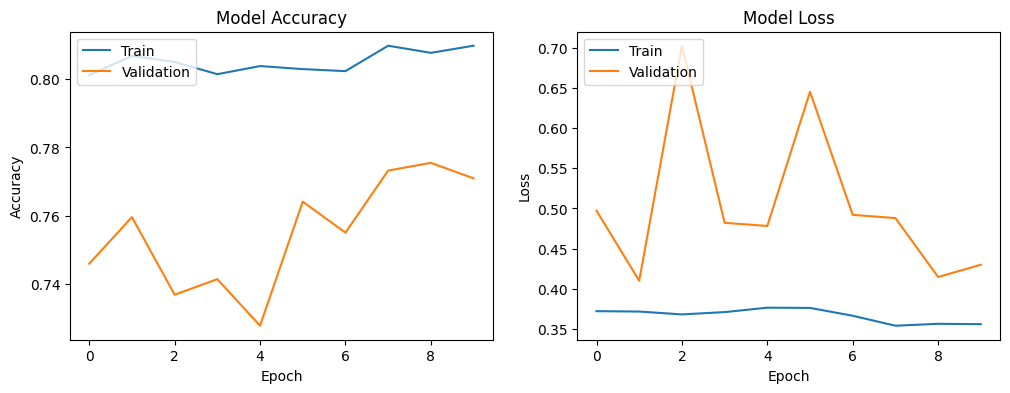

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the training history in a variable history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
